In [232]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RF


## Data 處理

In [233]:
train_df = pd.read_csv('./dataset/train.csv', index_col=0)
test_df = pd.read_csv('./dataset/test.csv', index_col=0)
train_label = train_df['SalePrice']
train_df.drop(['SalePrice'], axis=1, inplace=True)


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/usr/bin/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

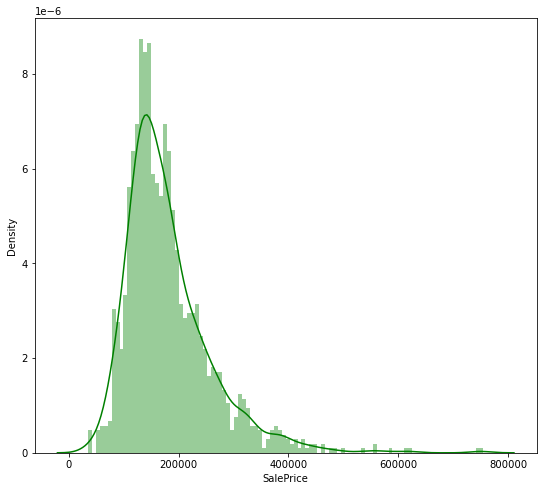

In [234]:
print(train_label.describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_label, color='g', bins=100, hist_kws={'alpha': 0.4})

In [235]:
list(set(train_df.dtypes.tolist()))
df_num = train_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

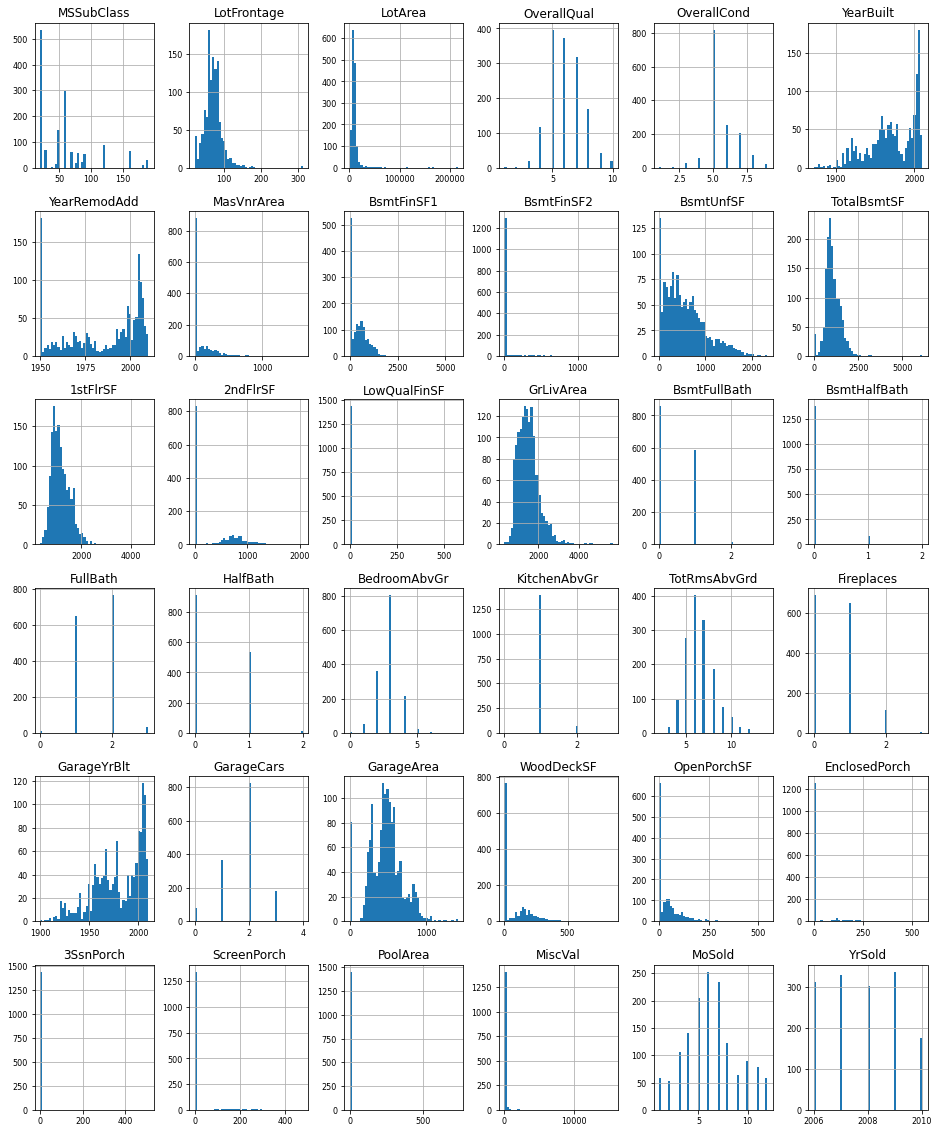

In [236]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [237]:

NAN = {}
for x  in  range(len(train_df.columns)):
    NAN[train_df.columns[x]] = train_df[train_df.columns[x]].isna().sum()  
sorted_NAN = dict(sorted(NAN.items(), key=lambda x: x[1], reverse=True))
Final = train_df.drop([x for x in list(sorted_NAN.keys())[:16] if x != 'LotFrontage'], axis=1)
Final.drop(['LotFrontage'], axis=1, inplace=True)
test_df.drop([x for x in list(sorted_NAN.keys())[:16] if x != 'LotFrontage'], axis=1, inplace=True)

In [238]:
test_df.drop(['LotFrontage'], axis=1, inplace=True)

In [239]:
NAN = {}
for x  in  range(len(Final.index)):
    NAN[Final.index[x]] = Final.iloc[Final.index[x]-1].isna().sum()  
sorted_NAN = dict(sorted(NAN.items(), key=lambda x: x[1], reverse=True))
Final = Final.drop([x for x in list(sorted_NAN)[0:9]], axis=0)
Label = train_label.drop([x for x in list(sorted_NAN)[0:9]], axis=0)


In [240]:
print(Label.shape)
print(Final.shape)

(1451,)
(1451, 63)


In [241]:
for i in Final.select_dtypes(include = ['object']).columns:
    dictlabel= dict(zip(list(set(Final[i])), range(len(list(set(Final[i]))))))
    Final[i] = Final[i].replace(dictlabel)
    test_df[i] = test_df[i].replace(dictlabel)
    

In [249]:
test_df.fillna(test_df.mean(), inplace=True)

In [251]:
test_df.isna().sum().sum()

0

In [265]:
Label

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1451, dtype: int64

## 甚麼都不做

In [266]:
model = RF()
model.fit(Final, Label)
ans = model.predict(test_df)

In [272]:
ans

array([129049.1 , 153849.75, 178862.74, ..., 157282.5 , 112006.21,
       227358.27])

In [277]:
from  xgboost import XGBRegressor  as XGBR
model = XGBR()
model.fit(Final, Label)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [278]:
ans = model.predict(test_df)


## Output 處理

In [280]:
import csv
with open('./dataset/ans.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(['Id', 'SalePrice'])
    write.writerows(zip(test_df.index, ans))
f.close

<function TextIOWrapper.close()>